In [2]:
from numpy.random import seed
seed(0)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('C:/Users/ravee/Jupyter/Skin-Cancer-Classification/data/data3.csv', header=None)
X = dataset.iloc[:, 0:61].values
Y = dataset.iloc[:, 62].values

In [4]:
# Important information about the data used in this model
# 0 - 11    : Color attributes (Mean, Std Dev)
# 12 - 37   : LBP attributes (Texture #1)
# 38 - 61  : GLCM attributes (Texture #2)

# 62 : Identifier

# 1 = Melanoma
# 2 = Basal Cell Carcinoma
# 3 = Squamous Cell Carcinoma

dataset

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,67.374839,63.340830,112.263065,55.737793,52.463312,91.327983,-0.033850,-0.032123,1.950237,1.981436,...,0.265834,0.995359,0.993634,0.995237,0.993613,0.076647,0.070833,0.076181,0.070668,1
1,52.300242,82.668481,137.457367,49.635884,75.253828,121.745271,0.134248,-0.066341,2.015002,1.921611,...,0.273114,0.992255,0.989582,0.991906,0.989182,0.082170,0.075512,0.081259,0.074591,1
2,76.645767,92.508307,148.996292,57.005206,67.924656,106.590925,0.057193,-0.050644,2.050657,2.006676,...,0.301113,0.994811,0.991801,0.993681,0.992398,0.099094,0.089396,0.095389,0.090669,1
3,11.615295,17.457194,27.802821,33.447148,48.877430,76.538757,0.077760,-0.670850,2.222315,2.906180,...,0.423064,0.987305,0.982757,0.987311,0.983433,0.187850,0.178278,0.187297,0.178983,1
4,46.209791,62.129607,101.965131,57.775117,75.554092,121.504623,0.146505,0.023257,1.958404,2.095389,...,0.304045,0.977174,0.968355,0.978547,0.970506,0.100605,0.090623,0.102176,0.092443,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,82.044136,83.768722,120.307772,89.496293,89.498528,126.176035,-0.343964,0.078492,2.098720,2.102761,...,0.307004,0.986611,0.981444,0.985685,0.981658,0.103888,0.093887,0.101714,0.094251,3
917,83.793886,79.859312,125.879575,71.660835,68.321651,105.753942,-0.102729,0.081119,1.886748,2.044726,...,0.259094,0.985333,0.981057,0.985738,0.980027,0.075938,0.068317,0.076629,0.067130,3
918,82.216087,63.332681,107.854577,81.626920,64.118188,105.661451,0.564203,-0.436504,2.575104,2.013750,...,0.240843,0.990387,0.987980,0.990964,0.987218,0.064741,0.059560,0.066223,0.058005,3
919,58.616472,58.697274,100.933170,65.831264,65.248561,108.459665,0.098212,-0.091045,1.973688,1.955592,...,0.216076,0.987113,0.982953,0.986366,0.981405,0.054408,0.048588,0.053877,0.046689,3


In [6]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [7]:
len(X_train)

736

In [8]:
len(X_test)

185

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [12]:
X_train[40]

array([-2.34419918, -1.95484002, -1.48497517, -2.6656988 , -1.96092465,
       -1.45043885, -0.26154909, -0.69429462,  0.33026858,  0.24021607,
        0.798922  ,  0.90585091, -1.33827607, -1.39843814, -1.51733163,
       -0.9415383 , -0.23172429,  0.45497378,  1.25208962,  1.8001798 ,
        2.50289295,  2.61697842,  2.78274551,  2.47232673,  2.09322706,
        1.39510846,  1.69710425,  1.45551505,  1.44648114,  0.82861778,
        1.30258822,  0.70867792,  0.63649836, -0.46630852, -1.02071653,
       -1.43666705, -0.45572584, -1.59858272, -0.78971024, -0.67342411,
       -0.70137639, -0.70021868, -0.92742581, -0.80691207, -0.80483084,
       -0.85757385,  0.95660696,  0.83757261,  0.82595463,  0.89375047,
       -1.01680535, -0.97204584, -1.04181874, -0.95578465,  1.1899139 ,
        1.17815021,  1.16725874,  1.1887328 , -0.92976239, -0.89442221,
       -0.94835319])

# Naive Bayes

In [152]:
# Implementation of Naive Bayes
# Fitting Naive Bayes to the training set

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [153]:
# Predicting the test set result
y_pred = nb.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm2 = multilabel_confusion_matrix(y_test, y_pred)

cm

array([[64,  4, 11],
       [26, 22, 12],
       [21, 10, 15]], dtype=int64)

In [154]:
# Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
print(np.mean(accuracies))

0.573435764531655


In [155]:
# Calculating the accuracy and other metrics

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

target_names = ['melanoma', 'bcc', 'scc']

# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_test, y_pred):
    originalclass.extend(y_test)
    predictedclass.extend(y_pred)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Nested CV with parameter optimization
nested_score = cross_val_score(estimator = nb, X = X, y = Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

              precision    recall  f1-score   support

           1       0.62      0.80      0.70        40
           2       0.54      0.22      0.31        32
           3       0.43      0.57      0.49        21

    accuracy                           0.55        93
   macro avg       0.53      0.53      0.50        93
weighted avg       0.55      0.55      0.52        93

              precision    recall  f1-score   support

           1       0.67      0.87      0.76        39
           2       0.65      0.45      0.54        33
           3       0.33      0.30      0.32        20

    accuracy                           0.60        92
   macro avg       0.55      0.54      0.54        92
weighted avg       0.59      0.60      0.58        92

              precision    recall  f1-score   support

           1       0.67      0.77      0.71        39
           2       0.64      0.42      0.51        33
           3       0.48      0.60      0.53        20

    accuracy        

In [156]:
# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass, target_names=target_names))

              precision    recall  f1-score   support

    melanoma       0.66      0.79      0.72       391
         bcc       0.61      0.39      0.47       323
         scc       0.37      0.43      0.40       207

    accuracy                           0.57       921
   macro avg       0.55      0.54      0.53       921
weighted avg       0.58      0.57      0.56       921



# K-Nearest Neighbors (K-NN)

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 3, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=3,
                     weights='distance')

In [158]:
# Predicting the test set result
y_pred = knn.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm2 = multilabel_confusion_matrix(y_test, y_pred)

cm

array([[72,  6,  1],
       [18, 34,  8],
       [16, 18, 12]], dtype=int64)

In [159]:
# Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print(np.mean(accuracies))

0.6779711218067381


In [18]:
# Applying Grid Search to Find the Best Hyperparameter

from sklearn.model_selection import GridSearchCV
parameters = [
    {'n_neighbors': [21, 23, 25, 27, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3], 'metric': ['minkowski']},
]

grid_search = GridSearchCV(estimator = knn, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(round(best_accuracy, 2))
print(best_parameters)

0.68
{'metric': 'minkowski', 'n_neighbors': 25, 'p': 3, 'weights': 'distance'}


In [160]:
# Calculating the accuracy and other metrics

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

target_names = ['melanoma', 'bcc', 'scc']

# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_test, y_pred):
    originalclass.extend(y_test)
    predictedclass.extend(y_pred)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Nested CV with parameter optimization
nested_score = cross_val_score(estimator = knn, X = X, y = Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

              precision    recall  f1-score   support

           1       0.73      0.90      0.81        40
           2       0.56      0.56      0.56        32
           3       0.58      0.33      0.42        21

    accuracy                           0.66        93
   macro avg       0.63      0.60      0.60        93
weighted avg       0.64      0.66      0.64        93

              precision    recall  f1-score   support

           1       0.72      0.92      0.81        39
           2       0.83      0.76      0.79        33
           3       0.67      0.40      0.50        20

    accuracy                           0.75        92
   macro avg       0.74      0.69      0.70        92
weighted avg       0.75      0.75      0.74        92

              precision    recall  f1-score   support

           1       0.79      0.87      0.83        39
           2       0.71      0.73      0.72        33
           3       0.53      0.40      0.46        20

    accuracy        

In [161]:
# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass, target_names=target_names))

              precision    recall  f1-score   support

    melanoma       0.74      0.87      0.80       391
         bcc       0.66      0.67      0.66       323
         scc       0.56      0.35      0.43       207

    accuracy                           0.69       921
   macro avg       0.65      0.63      0.63       921
weighted avg       0.67      0.69      0.67       921



# Support Vector Machine (SVM)

In [162]:
# Implementation of Support Vector Machine (SVM)
# Fitting SVM to the training set

from sklearn.svm import SVC
svm = SVC(C = 100, kernel = 'rbf', gamma = 0.001, random_state = 0)
#classifier = SVC(C = 1, kernel = 'poly', degree = 30, random_state = 0)
svm.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [163]:
# Predicting the test set result
y_pred = svm.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm2 = multilabel_confusion_matrix(y_test, y_pred)

cm

array([[75,  2,  2],
       [ 4, 49,  7],
       [ 6, 20, 20]], dtype=int64)

In [164]:
# Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print(np.mean(accuracies))

0.7580525731210662


In [54]:
# Applying Grid Search to Find the Best Hyperparameter

from sklearn.model_selection import GridSearchCV
parameters = [
    {'C': [1, 10, 100], 'kernel': ['rbf', 'sigmoid', 'poly'], 'gamma': [0.001, 0.01, 0.1, 10]},
]

grid_search = GridSearchCV(estimator = svm, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(round(best_accuracy, 2))
print(best_parameters)

0.76
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [166]:
# Calculating the accuracy and other metrics

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

target_names = ['melanoma', 'bcc', 'scc']

# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_test, y_pred):
    originalclass.extend(y_test)
    predictedclass.extend(y_pred)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Nested CV with parameter optimization
nested_score = cross_val_score(estimator = svm, X = X, y = Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

              precision    recall  f1-score   support

           1       0.86      0.95      0.90        40
           2       0.67      0.69      0.68        32
           3       0.50      0.38      0.43        21

    accuracy                           0.73        93
   macro avg       0.68      0.67      0.67        93
weighted avg       0.71      0.73      0.72        93

              precision    recall  f1-score   support

           1       0.95      0.97      0.96        39
           2       0.80      0.85      0.82        33
           3       0.71      0.60      0.65        20

    accuracy                           0.85        92
   macro avg       0.82      0.81      0.81        92
weighted avg       0.84      0.85      0.84        92

              precision    recall  f1-score   support

           1       0.95      0.92      0.94        39
           2       0.74      0.85      0.79        33
           3       0.75      0.60      0.67        20

    accuracy        

In [167]:
# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass, target_names=target_names))

              precision    recall  f1-score   support

    melanoma       0.91      0.93      0.92       391
         bcc       0.73      0.77      0.75       323
         scc       0.61      0.52      0.56       207

    accuracy                           0.78       921
   macro avg       0.75      0.74      0.74       921
weighted avg       0.78      0.78      0.78       921



# Decision Trees

In [168]:
# Some important notes here, before running the Decision Tree Classifier, it's ok to not scale the features, as this model
# does not work using euclidian distance, so it's fine as it is

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, random_state = 0, splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [169]:
# Predicting the test set result
y_pred = tree.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm2 = multilabel_confusion_matrix(y_test, y_pred)

cm

array([[69,  7,  3],
       [10, 41,  9],
       [14, 18, 14]], dtype=int64)

In [170]:
# Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print(np.mean(accuracies))

0.6345057386153277


In [171]:
# Applying Grid Search to Find the Best Hyperparameter

from sklearn.model_selection import GridSearchCV
parameters = [
    {'criterion': ['entropy', 'gini'], 'splitter': ['best', 'random'], 'ccp_alpha': [0.0, 0.05, 0.1], 'max_depth': [10, 20, 30]}
]

grid_search = GridSearchCV(estimator = tree, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(round(best_accuracy, 2))
print(best_parameters)

0.63
{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}


In [172]:
# Calculating the accuracy and other metrics

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

target_names = ['melanoma', 'bcc', 'scc']

# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_test, y_pred):
    originalclass.extend(y_test)
    predictedclass.extend(y_pred)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Nested CV with parameter optimization
nested_score = cross_val_score(estimator = tree, X = X, y = Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        40
           2       0.65      0.53      0.59        32
           3       0.41      0.52      0.46        21

    accuracy                           0.65        93
   macro avg       0.62      0.62      0.61        93
weighted avg       0.66      0.65      0.65        93

              precision    recall  f1-score   support

           1       0.83      0.74      0.78        39
           2       0.68      0.70      0.69        33
           3       0.39      0.45      0.42        20

    accuracy                           0.66        92
   macro avg       0.63      0.63      0.63        92
weighted avg       0.68      0.66      0.67        92

              precision    recall  f1-score   support

           1       0.70      0.79      0.75        39
           2       0.71      0.67      0.69        33
           3       0.47      0.40      0.43        20

    accuracy        

In [173]:
# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass, target_names=target_names))

              precision    recall  f1-score   support

    melanoma       0.77      0.78      0.77       391
         bcc       0.61      0.56      0.58       323
         scc       0.36      0.40      0.38       207

    accuracy                           0.62       921
   macro avg       0.58      0.58      0.58       921
weighted avg       0.62      0.62      0.62       921



# Random Forest (Ensemble)

In [174]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 150, max_depth = 10, criterion = 'entropy', class_weight = 'balanced', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [175]:
# Predicting the test set result
y_pred = forest.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm2 = multilabel_confusion_matrix(y_test, y_pred)

cm

array([[71,  7,  1],
       [ 7, 47,  6],
       [ 9, 20, 17]], dtype=int64)

In [176]:
# Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = forest, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(np.mean(accuracies))

0.7337652721214365


In [44]:
# Applying Grid Search to Find the Best Hyperparameter

from sklearn.model_selection import GridSearchCV
parameters = [
    {'criterion': ['entropy'], 'max_depth': [None, 10], 'n_estimators': [150, 200, 250], 'class_weight': [None, 'balanced', 'balanced_subsample']},
    {'criterion': ['gini'], 'max_depth': [None, 10], 'n_estimators': [150, 200, 250], 'class_weight': [None, 'balanced', 'balanced_subsample']}
]

grid_search = GridSearchCV(estimator = forest, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(round(best_accuracy, 2))
print(best_parameters)

0.73
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 150}


In [177]:
# Calculating the accuracy and other metrics

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

target_names = ['melanoma', 'bcc', 'scc']

# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_test, y_pred):
    originalclass.extend(y_test)
    predictedclass.extend(y_pred)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Nested CV with parameter optimization
nested_score = cross_val_score(estimator = forest, X = X, y = Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

              precision    recall  f1-score   support

           1       0.80      0.90      0.85        40
           2       0.57      0.62      0.60        32
           3       0.46      0.29      0.35        21

    accuracy                           0.67        93
   macro avg       0.61      0.60      0.60        93
weighted avg       0.64      0.67      0.65        93

              precision    recall  f1-score   support

           1       0.83      0.87      0.85        39
           2       0.74      0.79      0.76        33
           3       0.69      0.55      0.61        20

    accuracy                           0.77        92
   macro avg       0.75      0.74      0.74        92
weighted avg       0.77      0.77      0.77        92

              precision    recall  f1-score   support

           1       0.86      0.82      0.84        39
           2       0.64      0.82      0.72        33
           3       0.62      0.40      0.48        20

    accuracy        

In [178]:
# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass, target_names=target_names))

              precision    recall  f1-score   support

    melanoma       0.83      0.86      0.85       391
         bcc       0.66      0.75      0.70       323
         scc       0.55      0.40      0.46       207

    accuracy                           0.72       921
   macro avg       0.68      0.67      0.67       921
weighted avg       0.71      0.72      0.71       921



# Artificial Neural Network

In [184]:
# Importing the Keras libraries and packages
import keras
import sys
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [194]:
# Create categorical input for predictor

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
Y = Y.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_use = onehotencoder.fit_transform(Y).toarray()
y_binary = onehotencoder.fit_transform(y_train).toarray()
y_compare = onehotencoder.fit_transform(y_test).toarray()

In [186]:
# Initializing the ANN
ann = Sequential()

# Adding the input & hidden layer
ann.add(Dense(16, activation = 'relu', input_shape = (61,)))
ann.add(Dense(16, activation = 'relu'))
ann.add(Dense(3, activation = 'softmax'))
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_accuracy'])

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
            ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_loss', save_best_only = True)]

history = ann.fit(X_train, y_binary, batch_size = 10, epochs = 100, validation_data = (X_test, y_compare))

Train on 736 samples, validate on 185 samples
Epoch 1/100
736/736 [==============================] - 13s 17ms/step - loss: 1.0643 - accuracy: 0.4606 - categorical_accuracy: 0.4606 - val_loss: 0.9918 - val_accuracy: 0.5027 - val_categorical_accuracy: 0.5027
Epoch 2/100
736/736 [==============================] - 0s 99us/step - loss: 0.9065 - accuracy: 0.5883 - categorical_accuracy: 0.5883 - val_loss: 0.9233 - val_accuracy: 0.5622 - val_categorical_accuracy: 0.5622
Epoch 3/100
736/736 [==============================] - 0s 287us/step - loss: 0.8365 - accuracy: 0.6182 - categorical_accuracy: 0.6182 - val_loss: 0.8787 - val_accuracy: 0.5514 - val_categorical_accuracy: 0.5514
Epoch 4/100
736/736 [==============================] - 0s 171us/step - loss: 0.7792 - accuracy: 0.6576 - categorical_accuracy: 0.6576 - val_loss: 0.8373 - val_accuracy: 0.5784 - val_categorical_accuracy: 0.5784
Epoch 5/100
736/736 [==============================] - 0s 101us/step - loss: 0.7330 - accuracy: 0.6807 - catego

Epoch 78/100
736/736 [==============================] - 0s 98us/step - loss: 0.1607 - accuracy: 0.9389 - categorical_accuracy: 0.9389 - val_loss: 0.8087 - val_accuracy: 0.7568 - val_categorical_accuracy: 0.7568
Epoch 79/100
736/736 [==============================] - 0s 99us/step - loss: 0.1545 - accuracy: 0.9416 - categorical_accuracy: 0.9416 - val_loss: 0.8241 - val_accuracy: 0.7514 - val_categorical_accuracy: 0.7514
Epoch 80/100
736/736 [==============================] - 0s 104us/step - loss: 0.1523 - accuracy: 0.9443 - categorical_accuracy: 0.9443 - val_loss: 0.8386 - val_accuracy: 0.7568 - val_categorical_accuracy: 0.7568
Epoch 81/100
736/736 [==============================] - 0s 103us/step - loss: 0.1476 - accuracy: 0.9470 - categorical_accuracy: 0.9470 - val_loss: 0.8629 - val_accuracy: 0.7514 - val_categorical_accuracy: 0.7514
Epoch 82/100
736/736 [==============================] - 0s 99us/step - loss: 0.1425 - accuracy: 0.9538 - categorical_accuracy: 0.9538 - val_loss: 0.8291 -

In [187]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'val_categorical_accuracy', 'loss', 'accuracy', 'categorical_accuracy'])


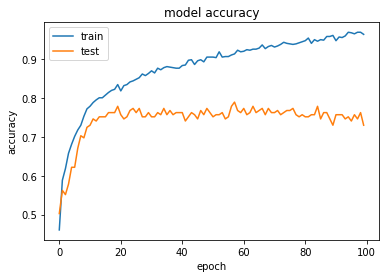

In [188]:
# Summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

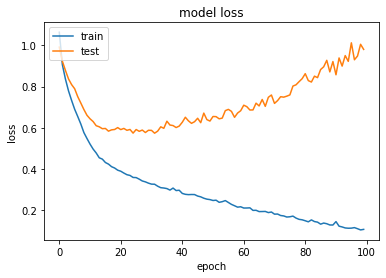

In [189]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [190]:
# Create threshold for multi-predictor
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [191]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

cm = confusion_matrix(y_compare.argmax(axis=1), y_pred.argmax(axis=1))

cm

array([[76,  2,  1],
       [ 6, 39, 15],
       [ 7, 20, 19]], dtype=int64)

In [192]:
# Calculating the accuracy and other metrics
#, scoring=make_scorer(classification_report_with_accuracy_score)

from sklearn.model_selection import StratifiedKFold, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

target_names = ['melanoma', 'bcc', 'scc']

# Variables for average classification report
originalclass = []
predictedclass = []

#Build the Model
def buildmodel():
    ann = Sequential()
    ann.add(Dense(16, activation = 'relu', input_shape = (61,)))
    ann.add(Dense(16, activation = 'relu'))
    ann.add(Dense(3, activation = 'softmax'))
    ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_accuracy'])
    return(ann)


#Make our customer score
def classification_report_with_accuracy_score(y_use, y_pred):
    originalclass.extend(y_use)
    predictedclass.extend(y_pred.argmax(axis=1))
    print(classification_report(y_use, y_pred.argmax(axis=1)))
    return accuracy_score(y_use, y_pred.argmax(axis=1)) # return accuracy score

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Nested CV with parameter optimization
ann = KerasRegressor(build_fn=buildmodel, epochs = 100, batch_size = 10, verbose = 0)
nested_score = cross_val_score(estimator = ann, X = X, y = y_use.argmax(1), cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        40
           1       0.53      0.56      0.55        32
           2       0.33      0.24      0.28        21

    accuracy                           0.66        93
   macro avg       0.58      0.58      0.58        93
weighted avg       0.63      0.66      0.64        93

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.75      0.73      0.74        33
           2       0.48      0.50      0.49        20

    accuracy                           0.75        92
   macro avg       0.71      0.71      0.71        92
weighted avg       0.75      0.75      0.75        92

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.77      0.70      0.73        33
           2       0.60      0.60      0.60        20

    accuracy        

In [193]:
# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass, target_names=target_names))

              precision    recall  f1-score   support

    melanoma       0.90      0.90      0.90       391
         bcc       0.68      0.73      0.71       323
         scc       0.51      0.45      0.48       207

    accuracy                           0.74       921
   macro avg       0.70      0.69      0.69       921
weighted avg       0.73      0.74      0.74       921



# XGBoost

In [179]:
# Importing the XGB Library and fit it to the data
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'dart', n_estimators = 100, normalize_type = 'forest', rate_drop = 0.1, sample_type = 'uniform', skip_drop = 0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              normalize_type='forest', nthread=None, objective='multi:softprob',
              random_state=0, rate_drop=0.1, reg_alpha=0, reg_lambda=1,
              sample_type='uniform', scale_pos_weight=1, seed=None, silent=None,
              skip_drop=0, subsample=1, verbosity=1)

In [180]:
# Predicting the test set result
y_pred = xgb.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm2 = multilabel_confusion_matrix(y_test, y_pred)

cm

array([[75,  3,  1],
       [ 6, 48,  6],
       [ 8, 24, 14]], dtype=int64)

In [181]:
# Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(np.mean(accuracies))

0.7310255460940392


In [12]:
# Applying Grid Search to Find the Best Hyperparameter
# {'objective': ['multi:softmax'], 'n_estimators': [25, 50, 100], 'booster': ['gbtree'], 'eta': [0.001, 0.002, 0.004], 'max_depth':[3], 'gamma': [0], 'subsample': [1], 'sampling_method': ['uniform', 'gradient_based']},
# {'objective': ['multi:softmax'], 'n_estimators': [109], 'booster': ['dart'], 'sample_type': ['uniform', 'weighted'], 'normalize_type': ['tree', 'forest'], 'rate_drop': [0, 0.1, 0.2], 'skip_drop': [0, 0.1, 0.2]}
# {'objective': ['multi:softmax'], 'n_estimators': [10, 25, 50], 'booster': ['gblinear'], 'feature_selector': ['greedy', 'cyclic', 'random', 'shuffle', 'thrifty'], 'updater': ['shotgun', 'coord_descent'], 'lambda': [0, 0.5, 1], 'alpha': [0, 0.5, 1]}

from sklearn.model_selection import GridSearchCV
parameters = [
    {'objective': ['multi:softmax'], 'n_estimators': [25, 50, 100], 'booster': ['gbtree'], 'eta': [0.001, 0.002, 0.004], 'max_depth':[3], 'gamma': [0], 'subsample': [1], 'sampling_method': ['uniform', 'gradient_based']},
    {'objective': ['multi:softmax'], 'n_estimators': [25, 50, 100], 'booster': ['dart'], 'sample_type': ['uniform', 'weighted'], 'normalize_type': ['tree', 'forest'], 'rate_drop': [0, 0.1, 0.2], 'skip_drop': [0, 0.1, 0.2]}
]

grid_search = GridSearchCV(estimator = xgb, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(round(best_accuracy, 2))
print(best_parameters)

0.75
{'booster': 'dart', 'n_estimators': 100, 'normalize_type': 'forest', 'objective': 'multi:softmax', 'rate_drop': 0.1, 'sample_type': 'uniform', 'skip_drop': 0}


In [182]:
# Calculating the accuracy and other metrics

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

target_names = ['melanoma', 'bcc', 'scc']

# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_test, y_pred):
    originalclass.extend(y_test)
    predictedclass.extend(y_pred)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Nested CV with parameter optimization
nested_score = cross_val_score(estimator = xgb, X = X, y = Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

              precision    recall  f1-score   support

           1       0.84      0.93      0.88        40
           2       0.57      0.62      0.60        32
           3       0.36      0.24      0.29        21

    accuracy                           0.67        93
   macro avg       0.59      0.60      0.59        93
weighted avg       0.64      0.67      0.65        93

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        39
           2       0.81      0.88      0.84        33
           3       0.71      0.60      0.65        20

    accuracy                           0.82        92
   macro avg       0.79      0.78      0.79        92
weighted avg       0.81      0.82      0.81        92

              precision    recall  f1-score   support

           1       0.83      0.90      0.86        39
           2       0.67      0.79      0.72        33
           3       0.55      0.30      0.39        20

    accuracy        

In [183]:
# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass, target_names=target_names))

              precision    recall  f1-score   support

    melanoma       0.86      0.90      0.88       391
         bcc       0.68      0.78      0.73       323
         scc       0.54      0.37      0.44       207

    accuracy                           0.74       921
   macro avg       0.69      0.68      0.68       921
weighted avg       0.72      0.74      0.73       921

